# Logistic Regression

在练习的这一部分中，您将建立一个逻辑回归模型来预测学生是否被大学录取。
假设您是大学系的管理员，并且您想根据每个申请人在两次考试中的结果来确定他们的入学机会。您有来自以前申请人的历史数据，可以用作逻辑回归的培训集。对于每个培训示例，您都有申请人在两次考试中的分数和录取决定。  
您的任务是建立一个分类模型，根据这两项考试的分数估计申请人的录取概率。
## Visualizing the data
在开始实现任何学习算法之前，需要可视化数据。在ex2.m的第一部分，代码将通过调用function plotData来加载数据并将其显示在二维绘图上。
您现在将在mlotData中完成代码，以便它显示一个像图1这样的数字，其中**轴是两个考试分数**，正负示例用不同的标记显示。

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
# 1.加载数据
path = './ex2/ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam1 score','Exam2 score','Admitted'])
# 读取前五行数据
data.head()

,Exam1 score,Exam2 score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


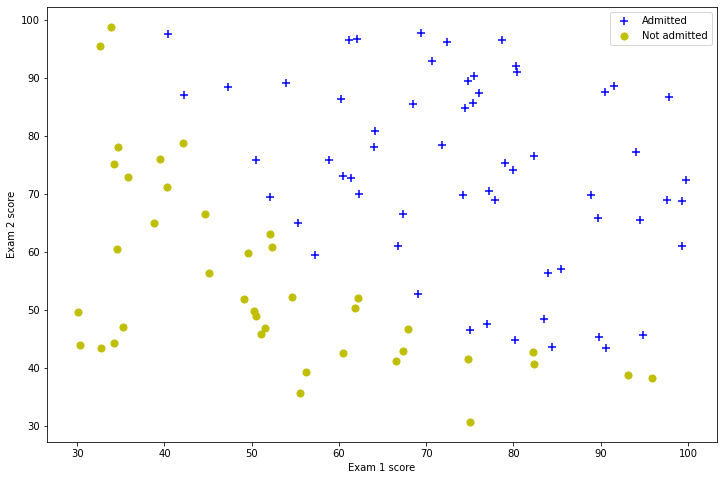

In [145]:
# 2. 可视化数据
## 正负示例使用不同的标记 admitted=1 正示例 用+ admitted=0 负示例 o
## isin()布尔索引  过滤数据https://blog.csdn.net/lzw2016/article/details/80472649

# 2.1 对admitted的不同情况进行分类 当admitted=0 使用negative表示其数据 
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
# 2.2 生成子图 根据positive和negative分别画出散点图
# plt.subplots返回一个包含figure和axis对象的元组 fig是绘画窗口 axis是坐标系
# figsize设置图形大小 宽12高8 https://blog.csdn.net/weixin_46649052/article/details/107424134
fig,ax=plt.subplots(figsize=(12,8))
# x,y,s:点的大小，c:颜色，marker:点的形状,label:标签
# https://blog.csdn.net/zjyklwg/article/details/79479468
ax.scatter(positive['Exam1 score'],positive['Exam2 score'],s=50,c='b',marker='+',label='Admitted')
ax.scatter(negative['Exam1 score'],negative['Exam2 score'],s=50,c='y',marker='o',label='Not admitted')
# 文字显示
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()

## Implementeation
### Warmup exercise:sigmoid function
逻辑回归假说被定义为：
$$
h_θ(x)=g(θ^Tx)
$$
函数g是sigmoid函数，被定义为：
$$
g(z)=\frac1 {1+e^{-z}}
$$
**实现sigmoid函数**.对于 x 的大正值，sigmoid 应接近 1，而对于较大的负值，sigmoid 应接近 0。评估 sigmoid（0） 应该正好得到 0.5。您的代码还应该使用向量和矩阵。对于矩阵，您的函数应在每个元素上执行 sigmoid 函数。

In [146]:
def sigmoid(z):
    # np.exp()->e^x
    return 1/(1+np.exp(-z))

### Cost function and gradient
**实现代价函数和逻辑回归的梯度下降法**,逻辑回归的代价函数公式为
$$
J(θ)=\frac1 m \sum_{i=1}^m [-y^ilog(h_θ(x^i))-(1-y^i)log(1-h_θ(x^i))]
$$
代价函数的梯度是与θ长度相同的向量，其中j^th元素被定义为(for j=0,1,..,n)
$$
\frac{∂J(θ)}{∂θ_j}=\frac1 m\sum_{i=1}^m(h_θ(x^i)-y^i)x_j^i
$$
请注意，虽然此梯度看起来与线性回归梯度相同，但公式实际上是不同的，因为线性回归和逻辑回归对 hθ（x） 的定义不同。完成后，您应该看到成本约为 0.693。

In [147]:
# 实现代价函数J(θ)
def costFunction(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    #multiply是ufunc函数，ufunc函数会对这两个数组的对应元素进行计算,计算内积
    ## 1.1 −𝑦*𝑙𝑜𝑔(ℎθ(𝑥𝑖))
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    ## 1.2 (1−𝑦𝑖)𝑙𝑜𝑔(1−ℎθ(𝑥𝑖))
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

In [148]:
#### 计算梯度
# 1. 初始化X，y,θ
#        loc:  在第一列插入数据，则 loc=0
#      column: 给插入的列取名，如 column='Ones'
#       value: 1
# 即为所有数据的第一列插入 1
data.insert(0,'Ones',1)
# shape[0]输出行数 shape[1]输出列数
cols = data.shape[1]
# illc[:,:]行数列数抽取数据 左闭右开原则
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
# 返回数组
theta = np.zeros(3)
# 2. 转换X y 的类型 转换为数组
X = np.array(X.values)
y = np.array(y.values)
# 初始theta是0 X是score y是admitted 计算代价 应该为0.693
costFunction(theta,X,y)

0.6931471805599453

In [149]:
# 计算梯度计算的函数 
def gradient(theta,X,y):
    # 将参数转化为矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    #代价函数的梯度是与θ长度相同的向量
    # ravel()将多维数据降为一维，
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X*theta.T)-y
    for i in range(parameters):
        # x是该列的数据
        term = np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad
    

### Learning parameters using fminunc

在前面的作业中，您通过实现梯度下降法找到了线性回归模型的最优参数。您编写了一个代价函数并计算其梯度，然后相应地采取了梯度下降步骤。这一次，您将使用一个名为 fminunc 的内置函数，而不是采用梯度下降步骤。  
fminunc 是一个优化求解器，用于查找无约束函数的最小值。对于逻辑回归，您希望使用**参数 θ的 优化代价函数 J（θ）**。  
具体而言，您将使用 fminunc 在给定固定数据集（X 和 y 值）的情况下，为逻辑回归成本函数找到最佳参数 θ。您将传递以下输入：  
• 尝试优化的参数的初始值。  
• 一个函数，当给定训练集和特定 θ 时，计算数据集 （X， y） 相对于 θ 的逻辑回归代价和梯度。  
```python
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
# GradObj设置为on 同时返回梯度和代价 允许在最小化函数使用梯度
#  MaxIter 选项设置为 400，fminunc 在终止之前最多运行 400 步
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
#指定带有 @（t）（costFunction（t， X， y））的函数。这将创建一个参数为 t 的函数，该函数调用costFunction
#允许将成本函数包装在与 fminunc 一起使用。
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);
# 如果正确完成成本函数，fminunc 将收敛于正确的优化参数，并返回成本和 θ 的最终值
# 只需要提供一个计算成本和梯度的函数。fminunc可以完成循环的编写和学习率的设置
% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
# 使用 θ 的最优参数调用costFunction 函数，期望成本约为 0.203。
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');
#最终 θ 值用于在训练数据上绘制决策边界
% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;
```
即 使用内置函数fminunc,可以计算逻辑回归模型的代价和梯度  
不用自定义迭代次数和步长，功能会告诉我们最优解。

In [150]:
import scipy.optimize as opt
# 提供常用优化算法

# 1. 在给定固定数据集（X 和 y 值）的情况下，为逻辑回归成本函数找到最佳参数 θ
# 有约束的多元函数问题 提供梯度信息 使用截断牛顿法
# func = costFunction 优化的目标函数
# x0=theta 初始值
# fprime = gradient 提供优化函数的梯度函数
# args=(X,y) 元组，传递给优化函数的参数
result = opt.fmin_tnc(func=costFunction,fprime=gradient,x0=theta,args=(X,y))
# result[0]是theta
result


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631537E-01   7.89087138E-01
    2    5  5.892425215690646E-01   7.39226659E+01
    3    7  4.227824013349988E-01   1.85265719E+01
    4    9  4.072926963747109E-01   1.68671130E+01
    5   11  3.818854870221429E-01   1.07735103E+01
    6   13  3.786234850041487E-01   2.31584929E+01
tnc: stepmx = 1000
    7   16  2.389268198743758E-01   3.00821998E+00
    8   18  2.047203892405198E-01   1.52227867E-01
    9   20  2.046713898944703E-01   6.62495276E-02
   10   22  2.035303162361215E-01   9.30780876E-04
tnc: fscale = 32.7775
   11   24  2.035293521271776E-01   8.07191978E-06
   12   26  2.035251112915609E-01   1.80213714E-04
   13   28  2.034984109909704E-01   5.02878482E-04
   14   30  2.034978382926863E-01   9.92360567E-06
   15   32  2.034977907837327E-01   3.77843767E-06
   16   34  2.034977388898613E-01   1.94830212E-05
   17   36  2.034977015894746E-01   2.33850311E-13


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [151]:
# 计算在该结论下的代价函数
# 使用 θ 的最优参数调用costFunction 函数，期望成本约为 0.203。
costFunction(result[0],X,y)

0.20349770158947458

# 决策曲线的参考代码
```python
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end
```

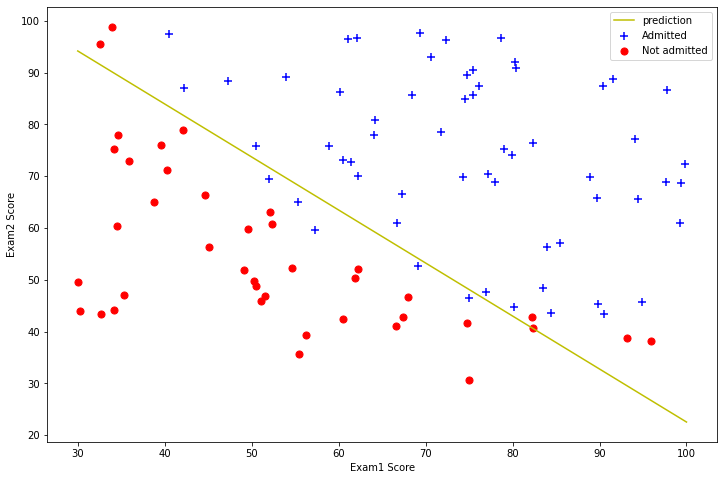

In [152]:
# 画出决策曲线
# np.linspace() 序列生成器，在线性空间以均匀步长生成数字序列
# 在30-100之间绘制100个线性序列
plotting_x1 = np.linspace(30,100,100)
# (-theta0-theta1*x)/theta2
plotting_h1 = (-result[0][0]-result[0][1]*plotting_x1)/result[0][2]    

fig,ax = plt.subplots(figsize=(12,8))
# ax.plot()绘制点、线或其他形状 'y'表示yellow
ax.plot(plotting_x1,plotting_h1,'y',label='prediction')
ax.scatter(positive['Exam1 score'],positive['Exam2 score'],s=50,c='b',marker='+',label='Admitted')
ax.scatter(negative['Exam1 score'],negative['Exam2 score'],s=50,c='r',marker='o',label='Not admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

### Evaluating logistic regression
确定参数后，就可以使用模型来预测一个学生是否被录取。一个Exam1得分45，Exam2得分85的学生，有0.776的可能性被录取。  
另一种评估参数的方法是看预测的模型在训练集的表现如何。 完成predict(),对于数据集和参数θ，输出1或0。然后把预测函数用于训练集，看准确率吧如何。

In [153]:
# 一个Exam1得分45，Exam2得分85的学生，有0.776的可能性被录取。
## 定义hθ()
def hfunc1(theta,X):
    # np.dot() theta.T*X
    return sigmoid(np.dot(X,theta))
hfunc1(result[0],[1,45,85])

0.7762906240463825

In [154]:
# 定义预测函数
def predict(theta,X):
#     if(hfunc1(theta,X)<0.5):
#         return 0
#     return 1
#     pro=hfunc1(theta,X)
    pro = sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in pro]
# predict(result[0],[1,45,85])

In [156]:
# 统计预测正确率
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct))%len(correct))
print('accuracy = {0} %'.format(accuracy))

accuracy = 89 %


# Regularized logistic regression
接下来实现**正则化逻辑回归，以预测制造厂的微芯片是否通过质量保证（QA）。在QA期间，每个微芯片都要经过各种测试，以确保其正常工作。**  
假设您是工厂的产品经理，并且您在两个不同的测试中拥有一些微芯片的测试结果。从这两个测试中，您需要确定微芯片应该被接受还是拒绝。为了帮助您做出决定，您有一个关于过去微芯片的测试结果数据集，您可以从中构建逻辑回归模型。
## Visualizing the data
坐标轴是两个测试分数，阳性（y = 1，接受）和阴性（y = 0，拒绝）的例子用不同的标记显示。  
根据可视化显示，我们的数据集不能通过绘图的直线分为正示例和否定示例。因此，直截了当的逻辑回归应用在这个数据集上表现不佳，因为逻辑回归只能找到线性决策边界。

In [157]:
# 1.加载数据
path = './ex2/ex2data2.txt'
data_init = pd.read_csv(path,header=None,names=['Microchip Test 1','Microchip Test 2','y'])
# 读取前五行数据
data_init.head()

,Microchip Test 1,Microchip Test 2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


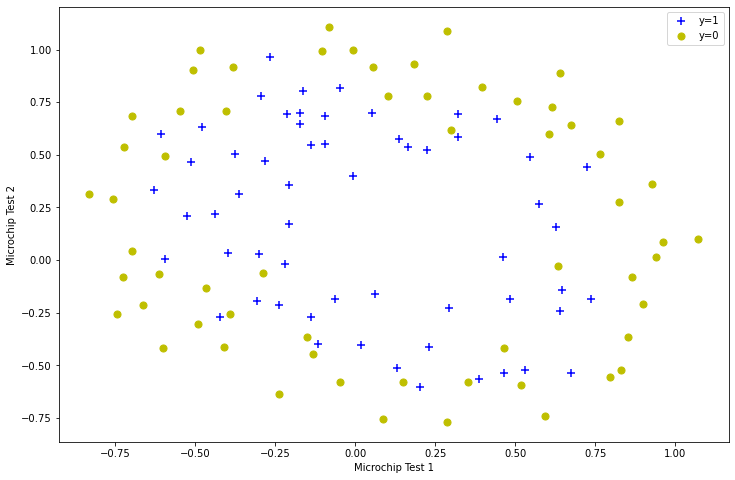

In [158]:
# 2. 可视化数据
## 正负示例使用不同的标记 admitted=1 正示例 用+ admitted=0 负示例 o
## isin()布尔索引  过滤数据https://blog.csdn.net/lzw2016/article/details/80472649

# 2.1 对admitted的不同情况进行分类 当admitted=0 使用negative表示其数据 
positive2 = data_init[data_init['y'].isin([1])]
negative2 = data_init[data_init['y'].isin([0])]
# 2.2 生成子图 根据positive和negative分别画出散点图
# plt.subplots返回一个包含figure和axis对象的元组 fig是绘画窗口 axis是坐标系
# figsize设置图形大小 宽12高8 https://blog.csdn.net/weixin_46649052/article/details/107424134
fig,ax=plt.subplots(figsize=(12,8))
# x,y,s:点的大小，c:颜色，marker:点的形状,label:标签
# https://blog.csdn.net/zjyklwg/article/details/79479468
ax.scatter(positive2['Microchip Test 1'],positive2['Microchip Test 2'],s=50,c='b',marker='+',label='y=1')
ax.scatter(negative2['Microchip Test 1'],negative2['Microchip Test 2'],s=50,c='y',marker='o',label='y=0')
# 文字显示
ax.legend()
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
plt.show()

## Feature mapping
更好地适应数据的一种方法是从每个数据点创建更多特征。在提供的函数mapFeature.m中，我们将把特征映射到x1和x2的所有多项式项中，直到第六次幂。
```python 
function out = mapFeature(X1, X2)
% MAPFEATURE Feature mapping function to polynomial features
%
%   MAPFEATURE(X1, X2) maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
%

degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end
```
由于这种映射，我们两个特征的向量（两个QA测试的分数）已转换为28维向量。在这个高维特征向量上训练的逻辑回归分类器将具有更复杂的决策边界，并在我们的二维图中绘制时显得非线性。

虽然特征映射允许我们构建更具表现力的分类器，但它也更容易过度拟合。在练习的下一部分，您将**实施正则化逻辑回归来适应数据，使用正则化解决过度拟合问题**。


In [159]:
# 特征映射 为每组数据创建更多特征 
# 最高6次幂
degree=6
data2 = data_init
x1 = data2['Microchip Test 1']
x2 = data2['Microchip Test 2']
# data2.insert(3,'Ones',1)
for i in range(1,degree+1):
    for j in range(0,i+1):
        # x1^(i-j) * x2^j
        data2['F'+str(i-j)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
# drop() 删除指定行列
#labels：MicroChip Test 1 字符或者数值，加上axis ，表示带label标识的行或者列；如 (labels='A', axis=1) 表示A列
#axis：1axis=0表示行，axis=1表示列 
#inplace：True表示删除某行后原dataframe变化，False不改变原始dataframe
data2.drop('Microchip Test 1',axis=1,inplace=True)
data2.drop('Microchip Test 2',axis=1,inplace=True)

data2.head()

,y,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 代价函数和梯度
**正则化逻辑回归模型代价函数和梯度的计算**  
$$
J(θ)=\frac1 m \sum_{i=1}^m [-y^ilog(h_θ(x^i))-(1-y^i)log(1-h_θ(x^i))]+\fracλ {2m} \sum_{j=1}^n θ_j^2
$$

注意：不需要正则化参数θ_0。  
代价函数的梯度的第j个元素的更新公式： 

$$
\frac{∂J(θ)}{∂θ_j}=\frac1 m\sum_{i=1}^m(h_θ(x^i)-y^i)x_j^i \quad for j=0\\
\frac{∂J(θ)}{∂θ_j}=(\frac1 m\sum_{i=1}^m(h_θ(x^i)-y^i)x_j^i)+\frac λ mθ_j  \quad for j>=1
$$
完成后，使用初始θ（全为0），代价计算为0.693

In [160]:
# 实现正则化的代价函数
def costReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    # 正则化 λ/m*θ
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    #λ/2𝑚  ∑𝑗=θ^2
    reg = (learningRate/(2*len(X)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first-second)/len(X)+reg

In [161]:
# 实现正则化的梯度计算
def gradientReg(theta,X,y,learningRate):
    # 将参数转化为矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    #代价函数的梯度是与θ长度相同的向量
    # ravel()将多维数据降为一维，
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X*theta.T)-y
    for i in range(parameters):
        # x是该列的数据
        term = np.multiply(error,X[:,i])
        if(i==0):
            grad[i]=np.sum(term)/len(X)
        else:
            grad[i]=np.sum(term)/len(X)+(learningRate/len(X))*theta[:,i]
    return grad
    

In [162]:
# 初始化X y θ

cols = data2.shape[1]
# illc[:,:]行数列数抽取数据 左闭右开原则
x2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
# 返回数组
theta2 = np.zeros(cols-1)
# 2. 转换X y 的类型 转换为数组
x2 = np.array(x2.values)
y2 = np.array(y2.values)
# 初始theta是0 X是score y是admitted 计算代价 应该为0.693
costReg(theta2,x2,y2,1)

0.6931471805599454

### Learning parameters using fminunc
正确的完成正则化逻辑回归的代价和成本

In [168]:
learningRate=1
result2 = opt.fmin_tnc(func=costReg,fprime=gradientReg,x0=theta2,args=(x2,y2,learningRate))
result2

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   3.00830320E-01
    1    5  6.888205030394400E-01   4.28854988E-03
    1   54  6.888205030394400E-01   4.28854988E-03
tnc: Linear search failed


(array([ 1.29482394e-02,  5.74494988e-03, -4.56792535e-02,  7.48518606e-03,
        -4.34790217e-02,  3.22220613e-03,  3.74580346e-04, -2.13521380e-03,
         2.68010850e-03, -1.55027340e-02,  2.66485107e-03, -6.60803438e-03,
         2.59397851e-03, -9.53549183e-03,  2.04131944e-03,  2.46235928e-04,
        -6.00841489e-04,  3.01961422e-05, -1.22631514e-03,  6.04046420e-03,
        -5.81529613e-03,  1.41853245e-03, -2.18147587e-03,  7.54376798e-04,
        -1.55789164e-03,  1.01651554e-03,  2.10914424e-03]),
 55,
 4)

## Plotting the desicion boundary
绘制区分正示例和负示例的（非线性）决策边界。将分类器的预测放在均匀间隔的网格上来绘制非线性决策边界，然后绘制预测从y = 0到y = 1的轮廓图。


In [164]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min,x2)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y2)]
accuracy = (sum(map(int,correct))%len(correct))
print('accuracy ={0}%'.format(accuracy))

accuracy =60%


In [165]:
# 计算假设函数
def hfunc2(theta,x1,x2):
    temp = theta[0][0]
    place=0
     #   out(:, end 1) = (X1.^(i-j)).*(X2.^j);
    for i in range(1,degree+1):
        for j in range(0,i+1):
            temp+=np.power(x1,i-j)*np.power(x2,j)*theta[0][place+1]
            place+=1
    return temp

In [166]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1,1.5,1000)
    t2 = np.linspace(-1,1.5,1000)
    cordinates = [(x,y)for x in t1 for y in t2]
    x_cord,y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord,'x2':y_cord})
    # 存放假设函数
    h_val['hval']=hfunc2(theta,h_val['x1'],h_val['x2'])
    decision = h_val[np.abs(h_val['hval'])<2*10**-3]
    return decision.x1,decision.x2

IndexError: index 27 is out of bounds for axis 0 with size 27

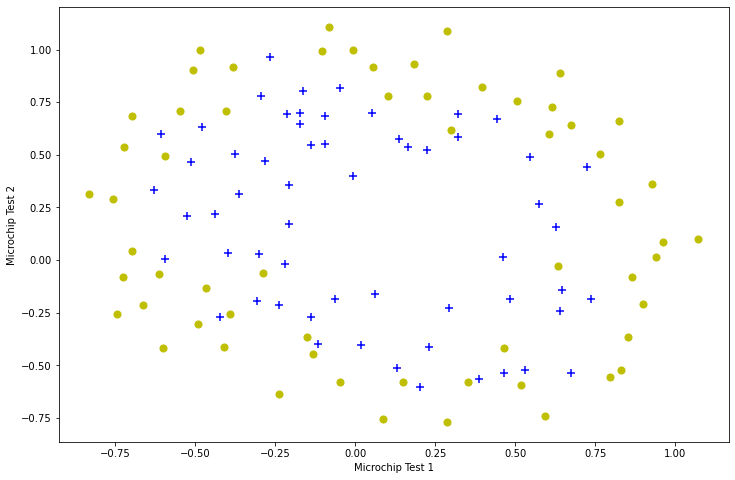

In [167]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Microchip Test 1'],positive2['Microchip Test 2'],s=50,c='b',marker='+',label='Accepted')
ax.scatter(negative2['Microchip Test 1'],negative2['Microchip Test 2'],s=50,c='y',marker='o',label='Rejected')
# 文字显示
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
x,y = find_decision_boundary(result2)
plt.scatter(x,y,c='r',s=10,label='Prediction')
ax.legend()

plt.show()